In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2022-06-10 06:06:19--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  20.8MB/s    in 6.5s    

2022-06-10 06:06:27 (12.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
!tar -zxvf aclImdb_v1.tar.gz > /dev/null
!pip3 install bert-embedding
!pip3 install mxnet-cu100
!pip3 install sentence-transformers
!ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 3.8 MB/s 
     |████████████████████████████████| 13.8 MB 58.4 MB/s 
     |████████████████████████████████| 29.6 MB 1.4 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259930 sha256=8145b5b9d80771a3f1e2efedb9dbddfaeae583f991546d4baea34412e1c14807
  Stored in directory: /root/.cache/pip/wheels/a6/41/8f/45bd1c58055d87aee5a71b6756a427ea8d92e506b3a9d17370
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 354.0 MB 5.2 kB/s 
     |████████████████████████████████| 15.7 MB 17.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
bert-embedding 1.0.1 requires numpy==1.14.6, but you have numpy 1.21.6 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 4.2 MB 23.4 MB/s 
     |████████████████████████████████| 1.2 MB 52.2 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 6.6 MB 57.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=746caf874f6725c41fa56a654418c67c619532c2f589c2b77075ed082f1f57ad
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
aclImdb  aclImdb_v1.tar.gz  sample_data


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.tag import pos_tag
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install mxnet
!pip install bert_embedding
!pip install sentence_transformers
import mxnet as mx
from bert_embedding import BertEmbedding
from sentence_transformers import SentenceTransformer
import gensim 
from gensim.models import Word2Vec 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.14.6-cp37-cp37m-manylinux1_x86_64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 req

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
bert-embedding 1.0.1 requires numpy==1.14.6, but you have numpy 1.21.6 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/drive')

Mounted at /drive


In [ ]:
path = "/drive/MyDrive/inflation_reports/dataset/data.csv"
df = pd.read_csv(path, encoding='latin-1')

In [ ]:
def to_sentiment(rating):

  if rating == 'negative':
    return 0
  elif rating == 'neutral':
    return 1
  elif rating == 'positive':
    return 2

df['score'] = df.sentiment.apply(to_sentiment)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

train_data["text"] = train_data["sentence"]
test_data["text"] = test_data["sentence"]

train_data = pd.DataFrame(train_data, columns=['text', 'score'])
test_data = pd.DataFrame(test_data, columns=['text', 'score'])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


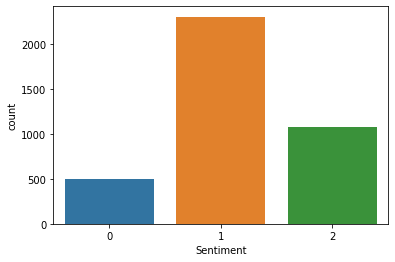

In [ ]:
#train_data.head()
sns.countplot(train_data.score)
plt.xlabel('Sentiment');

In [ ]:
# Debugging
train_data.head()
test_data.head()


,text,score
3207,The company was supposed to deliver machinery ...,1
1684,UNC Charlotte would also deploy SSH Tectia Con...,1
1044,"In 2009 , Lee & Man had a combined annual prod...",1
4145,`` That 's a very high figure on the European ...,1
1538,"In Finland , the corresponding service is Alma...",1


In [ ]:
def NormalizeWithPOS(text):
    # Lemmatization & Stemming according to POS tagging

    word_list = word_tokenize(text)
    rev = []
    lemmatizer = WordNetLemmatizer() 
    stemmer = PorterStemmer() 
    for word, tag in pos_tag(word_list):
        if tag.startswith('J'):
            w = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('V'):
            w = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('N'):
            w = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('R'):
            w = lemmatizer.lemmatize(word, pos='r')
        else:
            w = word
        w = stemmer.stem(w)
        rev.append(w)
    review = ' '.join(rev)
    return review

In [ ]:
def cleanText(text):
    
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)
    
    
    text = text.strip().lower()
    
    if embedding is 'WORD2VEC_NO_STOP':
        # Remove Stop words
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any'})
        stop_words = default_stop_words.union({"'m", "n't", "'d", "'re", "'s",
                                               'would','must',"'ve","'ll",'may'})
    
        word_list = word_tokenize(text)
        filtered_list = [w for w in word_list if not w in stop_words]
        text = ' '.join(filtered_list)
    
    if embedding is not 'BERT':
        # Remove other contractions
        text = re.sub(r"'", ' ', text)
    
    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

In [ ]:
embedding = ''
# for Word2Vec with stop words
train_data['clean_text'] = train_data['text'].apply(cleanText)
test_data['clean_text'] = test_data['text'].apply(cleanText)
# for BOW and TFIDF(s)
train_data['clean_text_normalized'] = train_data['clean_text'].apply(NormalizeWithPOS)
test_data['clean_text_normalized'] = test_data['clean_text'].apply(NormalizeWithPOS)

In [ ]:
freq_train = pd.Series(' '.join(train_data['clean_text_normalized']).split()).value_counts()
less_five_freq_train = freq_train[(freq_train <5)]
print(less_five_freq_train)

kaukomarkkinat    4
thesi             4
mostli            4
telko             4
alloc             4
                 ..
antniemi          1
refut             1
interbank         1
camara            1
venezuel          1
Length: 4411, dtype: int64


In [ ]:
freq_test = pd.Series(' '.join(test_data['clean_text_normalized']).split()).value_counts()
less_five_freq_test = freq_test[(freq_test <5)]
print(less_five_freq_test)

hkscan        4
emiss         4
collect       4
sever         4
expans        4
             ..
realiz        1
dok           1
bratsk        1
ilim          1
consortium    1
Length: 2291, dtype: int64


In [ ]:
train_data['clean_text_normalized'] = train_data['clean_text_normalized'].apply(lambda x: ' '.join(x for x in x.split() if x not in less_five_freq_train))
test_data['clean_text_normalized'] = test_data['clean_text_normalized'].apply(lambda x: ' '.join(x for x in x.split() if x not in less_five_freq_test))

In [ ]:
embedding = 'WORD2VEC_NO_STOP'
# for Word2Vec without stop words
train_data['clean_text_w2v_no_stop'] = train_data['text'].apply(cleanText)
test_data['clean_text_w2v_no_stop'] = test_data['text'].apply(cleanText)
embedding = 'BERT'
# for BERT(s)
train_data['clean_text_bert'] = train_data['text'].apply(cleanText)
test_data['clean_text_bert'] = test_data['text'].apply(cleanText)

In [ ]:
# Debugging
print("A review example of dataset before cleaning:", end="\n\n")
print(train_data.iloc[3]['text'], end='\n\n')

print("clean_text:")
print(train_data.iloc[3]['clean_text'], end="\n\n")

print("clean_text_normalized:")
print(train_data.iloc[3]['clean_text_normalized'], end="\n\n")

print("clean_text_w2v_no_stop:")
print(train_data.iloc[3]['clean_text_w2v_no_stop'], end="\n\n")

print("clean_text_bert:")
print(train_data.iloc[3]['clean_text_bert'], end="\n\n")

A review example of dataset before cleaning:

The bridge will be 1.2 km long and is located between Anasmotet by the road E20 and the new traffic junction in Marieholm by the road E45 .

clean_text:
the bridge will be km long and is located between anasmotet by the road and the new traffic junction in marieholm by the road

clean_text_normalized:
the bridg will be km long and be locat between by the road and the new traffic in by the road

clean_text_w2v_no_stop:
bridge km long located anasmotet road new traffic junction marieholm road

clean_text_bert:
the bridge will be 1.2 km long and is located between anasmotet by the road e20 and the new traffic junction in marieholm by the road e45 .



In [ ]:
def mean(z): # used for BERT (word version) and Word2Vec
    return sum(itertools.chain(z))/len(z)

In [ ]:
embedding = 'BOW'
vectorizer = CountVectorizer(stop_words='english')

bow_training_features = vectorizer.fit_transform(train_data["clean_text_normalized"])    
bow_test_features = vectorizer.transform(test_data["clean_text_normalized"])

print(bow_test_features)

  (0, 224)	1
  (0, 309)	1
  (0, 731)	1
  (0, 1051)	1
  (0, 1101)	1
  (1, 66)	1
  (1, 247)	1
  (1, 383)	1
  (1, 1137)	1
  (2, 59)	1
  (2, 160)	1
  (2, 208)	1
  (2, 216)	1
  (2, 788)	1
  (2, 902)	1
  (2, 987)	1
  (2, 1004)	1
  (2, 1324)	2
  (3, 110)	1
  (3, 149)	1
  (3, 411)	1
  (3, 468)	1
  (3, 564)	1
  (3, 579)	1
  (3, 597)	1
  :	:
  (965, 1408)	1
  (966, 148)	1
  (966, 805)	2
  (966, 1077)	1
  (966, 1080)	1
  (967, 46)	1
  (967, 149)	1
  (967, 271)	1
  (967, 272)	1
  (967, 373)	1
  (967, 908)	1
  (967, 987)	1
  (967, 1119)	1
  (967, 1159)	1
  (968, 327)	1
  (968, 357)	1
  (968, 396)	1
  (968, 408)	2
  (968, 1088)	1
  (968, 1159)	1
  (969, 772)	1
  (969, 825)	1
  (969, 902)	1
  (969, 1153)	1
  (969, 1219)	1


In [ ]:

embedding = 'TFIDF_WITH_STOP'
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)

tfidf_with_stop_training_features = vectorizer.fit_transform(train_data["clean_text_normalized"])    
tfidf_with_stop_test_features = vectorizer.transform(test_data["clean_text_normalized"])

print(tfidf_with_stop_training_features.shape)

(3876, 20000)


In [ ]:
embedding = 'TFIDF_NO_STOP'
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20000)

tfidf_no_stop_training_features = vectorizer.fit_transform(train_data["clean_text_normalized"])    
tfidf_no_stop_test_features = vectorizer.transform(test_data["clean_text_normalized"])

print(tfidf_no_stop_training_features.shape)

(3876, 20000)


In [ ]:
def embeddToWord2Vec(text):
    words = word_tokenize(text)
    
    if embedding is 'WORD2VEC_WITH_STOP':
        result = [w2v_with_stop_model.wv[w] for w in words if w in w2v_with_stop_model.wv.vocab]
    else:
        result = [w2v_no_stop_model.wv[w] for w in words if w in w2v_no_stop_model.wv.vocab]
    
    feature = [mean(x) for x in zip(*result)]
    return feature

In [ ]:
def wordTokenize(text):
  return word_tokenize(text)

In [ ]:
embedding = 'WORD2VEC_WITH_STOP'
words = train_data['clean_text'].apply(wordTokenize)
w2v_with_stop_model = gensim.models.Word2Vec(words, min_count = 2, size = 100, window = 5) 
word2vec_with_stop_training_features = train_data['clean_text'].apply(embeddToWord2Vec)
word2vec_with_stop_test_features = test_data['clean_text'].apply(embeddToWord2Vec)
feature = [x for x in word2vec_with_stop_training_features.transpose()]
word2vec_with_stop_training_features = np.asarray(feature)

feature = [x for x in word2vec_with_stop_test_features.transpose()]
word2vec_with_stop_test_features = np.asarray(feature)

print(word2vec_with_stop_training_features.shape)

(3876, 100)


In [ ]:
embedding = 'WORD2VEC_NO_STOP'
words = train_data['clean_text_w2v_no_stop'].apply(wordTokenize)
w2v_no_stop_model = gensim.models.Word2Vec(words, min_count = 2, size = 80, window = 5) 
word2vec_no_stop_training_features = train_data['clean_text'].apply(embeddToWord2Vec)
word2vec_no_stop_test_features = test_data['clean_text'].apply(embeddToWord2Vec)
feature = [x for x in word2vec_no_stop_training_features.transpose()]
word2vec_no_stop_training_features = np.asarray(feature, dtype=object)

feature = [x for x in word2vec_no_stop_test_features.transpose()]
word2vec_no_stop_test_features = np.asarray(feature, dtype=object)

print(word2vec_no_stop_training_features.shape)

(3876,)


In [ ]:
# Cleaning before BERT
embedding = 'BERT'

In [ ]:
def embeddToBERT(text):
    sentences = re.split('!|\?|\.',text)
    sentences = list(filter(None, sentences)) 

    result = bert_transformers.encode(sentences)
    feature = [mean(x) for x in zip(*result)]
  
    return feature

In [ ]:
bert_transformers = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
bert_version = 'SENTENCE'
bert_sentence_training_features = train_data['clean_text_bert'].apply(embeddToBERT)
bert_sentence_test_features = test_data['clean_text_bert'].apply(embeddToBERT)
feature = [x for x in bert_sentence_training_features.transpose()]
bert_sentence_training_features = np.asarray(feature)

feature = [x for x in bert_sentence_test_features.transpose()]
bert_sentence_test_features = np.asarray(feature)

print(bert_sentence_training_features.shape)

(3876, 768)


In [ ]:
#Classifiers
from itertools import cycle
import seaborn as sns
from sklearn.preprocessing import label_binarize

In [114]:
# A function to plot and print result
def printResult(method, classification, y_pred, y_prob):
    print("Method: %s" % method)  
    print("Classifier: %s" % classification)  
    acc = accuracy_score(test_data["score"], y_pred)
    # Result
    print("Accuracy: {:.2f}".format(acc*100),end='\n\n')

    print(classification_report(test_data["score"],y_pred))


    cm = confusion_matrix(test_data["score"],y_pred)

    class_names = ['negative', 'neutral', 'positive']
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

    hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');


    # Plot

    y_pred = label_binarize(y_pred, classes=[0, 1, 2])
    n_classes = y_pred.shape[1]


    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_pred[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print ("Area under the ROC curve : %f" % roc_auc[i])    

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_pred.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    # plt.plot(
    #     fpr["micro"],
    #     tpr["micro"],
    #     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #     color="deeppink",
    #     linestyle=":",
    #     linewidth=4,
    # )

    # plt.plot(
    #     fpr["macro"],
    #     tpr["macro"],
    #     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    #     color="navy",
    #     linestyle=":",
    #     linewidth=4,
    # )

    # colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    # for i, color in zip(range(n_classes), colors):
    #     plt.plot(
    #         fpr[i],
    #         tpr[i],
    #         color=color,
    #         lw=2,
    #         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    #     )

    # plt.plot([0, 1], [0, 1], "k--", lw=2)
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.title("Some extension of Receiver operating characteristic to multiclass")
    # plt.legend(loc="lower right")
    # plt.show()

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [117]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(bow_training_features, train_data["score"])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [118]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


Method: Bag of Words
Classifier: Support Vector Machine
Accuracy: 74.43

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       110
           1       0.75      0.93      0.83       571
           2       0.74      0.49      0.59       289

    accuracy                           0.74       970
   macro avg       0.72      0.63      0.66       970
weighted avg       0.74      0.74      0.73       970

Area under the ROC curve : 0.998376
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


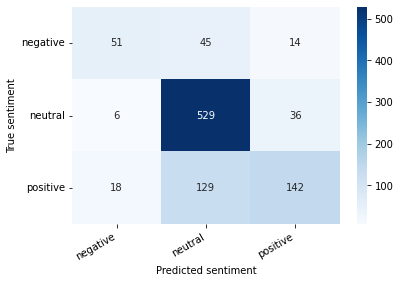

In [119]:

method = "Bag of Words"
classification = "Support Vector Machine"
model = SVC(C=100, gamma=0.001)

# Training BoW
model.fit(bow_training_features, train_data["score"])

# Evaluation
y_pred_bow_svm = model.predict(bow_test_features)
y_prob_bow_svm = model.decision_function(bow_test_features)
# Result

printResult(method, classification, y_pred_bow_svm, y_prob_bow_svm)

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(tfidf_with_stop_training_features, train_data["score"])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.8s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


Method: TF-IDF with stop words
Classifier: Support Vector Machine
Accuracy: 78.56

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       110
           1       0.80      0.89      0.84       571
           2       0.75      0.65      0.69       289

    accuracy                           0.79       970
   macro avg       0.77      0.71      0.74       970
weighted avg       0.78      0.79      0.78       970

Area under the ROC curve : 0.998312
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


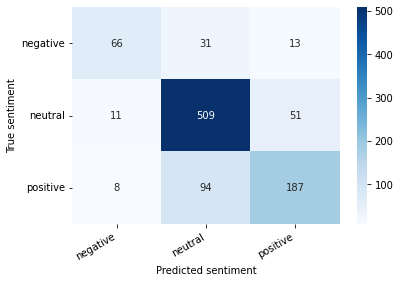

In [123]:
method = "TF-IDF with stop words"
classification = "Support Vector Machine"

model = SVC(C=10, gamma=0.1)

# Training 
model.fit(tfidf_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_with_stop_svm = model.predict(tfidf_with_stop_test_features)
y_prob_tfidf_with_stop_svm = model.decision_function(tfidf_with_stop_test_features)

# Result
printResult(method, classification, y_pred_tfidf_with_stop_svm, y_prob_tfidf_with_stop_svm)

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(tfidf_no_stop_training_features, train_data["score"])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.5s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


Method: TD-IDF with no stop words
Classifier: Support Vector Machine
Accuracy: 74.85

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       110
           1       0.79      0.85      0.82       571
           2       0.68      0.63      0.65       289

    accuracy                           0.75       970
   macro avg       0.72      0.68      0.69       970
weighted avg       0.74      0.75      0.74       970

Area under the ROC curve : 0.998393
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


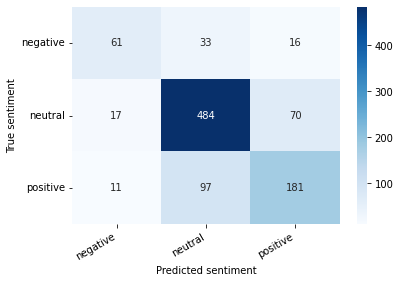

In [124]:
method = "TD-IDF with no stop words"
classification = "Support Vector Machine"

model = SVC(C=100, gamma=0.01)

# Training 
model.fit(tfidf_no_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_no_stop_svm = model.predict(tfidf_no_stop_test_features)
y_prob_tfidf_no_stop_svm = model.decision_function(tfidf_no_stop_test_features)

# Result
printResult(method, classification, y_pred_tfidf_no_stop_svm, y_prob_tfidf_no_stop_svm)

In [ ]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(word2vec_with_stop_training_features, train_data["score"])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=1, kernel='poly')


Method: TD-IDF stop
Classifier: SVM
Accuracy: 68.14

              precision    recall  f1-score   support

           0       0.64      0.32      0.42       110
           1       0.69      0.96      0.80       571
           2       0.67      0.26      0.38       289

    accuracy                           0.68       970
   macro avg       0.66      0.51      0.53       970
weighted avg       0.68      0.68      0.63       970

Area under the ROC curve : 0.995370
Area under the ROC curve : 0.998397
Area under the ROC curve : 0.968660


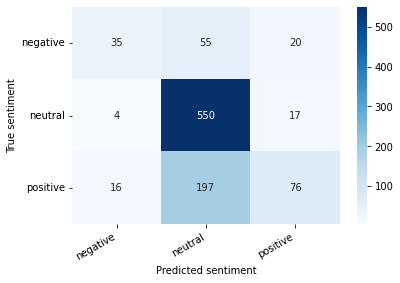

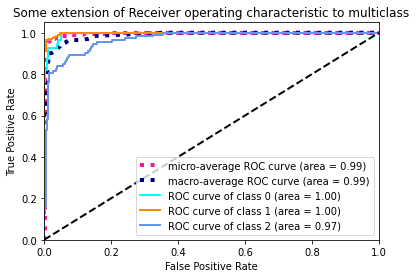

In [110]:
model = SVC(C=10, gamma=1, kernel='poly', probability=True)

# Training 
model.fit(word2vec_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_w2v_with_stop_svm = np.argmax(model.predict_proba(word2vec_with_stop_test_features), axis=-1)
y_prob_w2v_with_stop_svm = model.decision_function(word2vec_with_stop_test_features)
# Result
printResult("TD-IDF stop", "SVM", y_pred_w2v_with_stop_svm, y_prob_w2v_with_stop_svm)

In [66]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(bert_sentence_training_features, train_data["score"])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  10.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   3.4s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

Method: BERT sentences
Classifier: SVC
Accuracy: 80.72

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.84      0.88      0.86       571
           2       0.77      0.68      0.72       289

    accuracy                           0.81       970
   macro avg       0.78      0.77      0.77       970
weighted avg       0.81      0.81      0.80       970

Area under the ROC curve : 0.999795
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


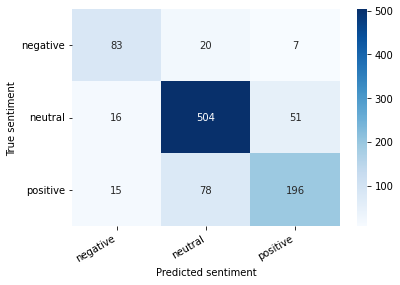

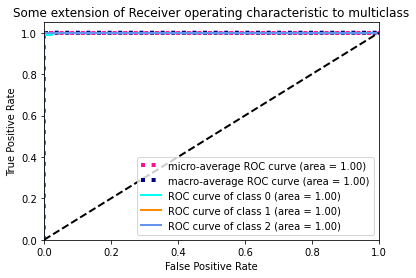

In [67]:
model = grid.best_estimator_
# Training 
model.fit(bert_sentence_training_features, train_data["score"])

# Evaluation
y_pred_bert_sentences_svm = model.predict(bert_sentence_test_features)
y_prob_bert_sentences_svm = model.decision_function(bert_sentence_test_features)
# Result
printResult("BERT sentences", "SVC", y_pred_bert_sentences_svm, y_prob_bert_sentences_svm)

In [68]:
#!!!!!! Bernoulli NB!!!!!

In [69]:
#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
grid.fit(bow_training_features.toarray(), train_data["score"])

print(grid.best_estimator_)
#model = MultinomialNB()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
BernoulliNB()


Method: Bag Of Words
Classifier: Bernoulli Naive-Bayes
Accuracy: 72.78

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       110
           1       0.75      0.91      0.82       571
           2       0.73      0.44      0.55       289

    accuracy                           0.73       970
   macro avg       0.68      0.63      0.64       970
weighted avg       0.72      0.73      0.71       970

Area under the ROC curve : 0.999967
Area under the ROC curve : 0.999607
Area under the ROC curve : 0.999692


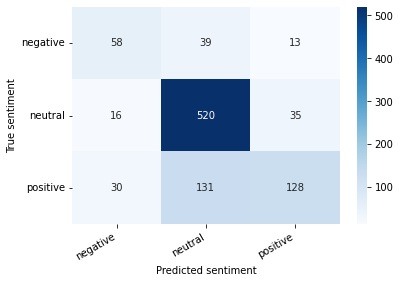

In [125]:
model = BernoulliNB()
# Training
model.fit(bow_training_features.toarray(), train_data["score"])

# Evaluation
y_pred_bow_nb = model.predict(bow_test_features.toarray())

y_prob_bow_nb = model.predict_proba(bow_test_features.toarray())
# Result
printResult("Bag Of Words", "Bernoulli Naive-Bayes", y_pred_bow_nb, y_prob_bow_nb)

In [71]:
grid = GridSearchCV(BernoulliNB(), param_grid=params, cv=5, verbose=5)
grid.fit(tfidf_with_stop_training_features, train_data["score"])

print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.706 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.732 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.723 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.763 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.693 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.702 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.738 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.721 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.759 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.705 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.728 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;,

Method: TD-IDF with stop words
Classifier: Bernoulli Naive-Bayes
Accuracy: 74.23

              precision    recall  f1-score   support

           0       0.78      0.43      0.55       110
           1       0.73      0.94      0.83       571
           2       0.76      0.46      0.58       289

    accuracy                           0.74       970
   macro avg       0.76      0.61      0.65       970
weighted avg       0.75      0.74      0.72       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


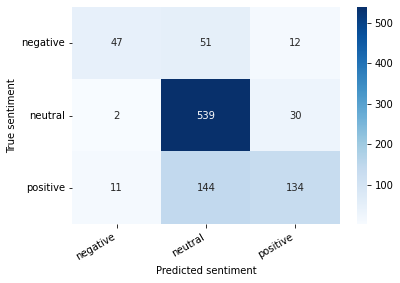

In [128]:
method = "TD-IDF with stop words"
classification = "Bernoulli Naive-Bayes"

model = BernoulliNB(alpha=0.5)

# Training
model.fit(tfidf_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_with_stop_nb = model.predict(tfidf_with_stop_test_features)
y_prob_tfidf_with_stop_nb = model.predict_proba(tfidf_with_stop_test_features)

# Result
printResult(method, classification, y_pred_tfidf_with_stop_nb, y_prob_tfidf_with_stop_nb)

In [73]:
grid = GridSearchCV(BernoulliNB(), param_grid=params, cv=5, verbose=5)
grid.fit(tfidf_no_stop_training_features, train_data["score"])

print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.665 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.646 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.659 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.668 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.662 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.669 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.672 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.685 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.683 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.666 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.686 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;,

Method: TD-IDF with no stop words
Classifier: Bernoulli Naive-Bayes
Accuracy: 71.86

              precision    recall  f1-score   support

           0       0.82      0.29      0.43       110
           1       0.71      0.97      0.82       571
           2       0.74      0.38      0.51       289

    accuracy                           0.72       970
   macro avg       0.76      0.55      0.59       970
weighted avg       0.73      0.72      0.68       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


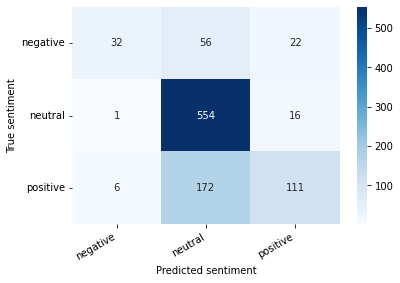

In [130]:
method = "TD-IDF with no stop words"
classification = "Bernoulli Naive-Bayes"

model = BernoulliNB(alpha=0.5)
# Training
model.fit(tfidf_no_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_no_stop_nb = model.predict(tfidf_no_stop_test_features)

y_prob_tfidf_no_stop_nb = model.predict_proba(tfidf_no_stop_test_features)
# Result
printResult(method, classification, y_pred_tfidf_no_stop_nb, y_prob_tfidf_no_stop_nb)

In [75]:
grid = GridSearchCV(BernoulliNB(), param_grid=params, cv=5, verbose=5)
grid.fit(word2vec_with_stop_training_features, train_data["score"])

print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.594 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.585 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.643 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.613 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.588 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.594 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.585 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.643 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.613 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.588 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.594 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;,

Method: Word2Vec
Classifier: Bernoulli Naive-Bayes
Accuracy: 60.52

              precision    recall  f1-score   support

           0       0.31      0.42      0.36       110
           1       0.67      0.92      0.77       571
           2       0.42      0.06      0.10       289

    accuracy                           0.61       970
   macro avg       0.47      0.46      0.41       970
weighted avg       0.55      0.61      0.53       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


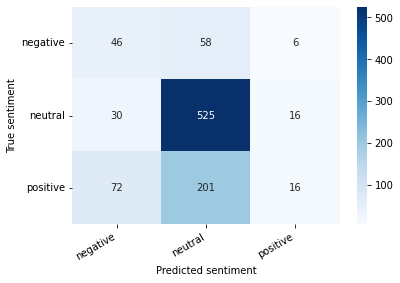

In [132]:
method = "Word2Vec"
classification = "Bernoulli Naive-Bayes"

model = BernoulliNB(alpha=10.0)

# Training 
model.fit(word2vec_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_w2v_with_stop_nb = model.predict(word2vec_with_stop_test_features)
y_prob_w2v_with_stop_nb = model.predict_proba(word2vec_with_stop_test_features)

# Result
printResult(method, classification, y_pred_w2v_with_stop_nb, y_prob_w2v_with_stop_nb)

In [77]:
grid = GridSearchCV(BernoulliNB(), param_grid=params, cv=5, verbose=5)
grid.fit(bert_sentence_training_features, train_data["score"])

print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.655 total time=   0.1s
[CV 2/5] END ........................alpha=0.01;, score=0.662 total time=   0.1s
[CV 3/5] END ........................alpha=0.01;, score=0.708 total time=   0.1s
[CV 4/5] END ........................alpha=0.01;, score=0.670 total time=   0.1s
[CV 5/5] END ........................alpha=0.01;, score=0.676 total time=   0.1s
[CV 1/5] END .........................alpha=0.1;, score=0.655 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.662 total time=   0.1s
[CV 3/5] END .........................alpha=0.1;, score=0.708 total time=   0.1s
[CV 4/5] END .........................alpha=0.1;, score=0.668 total time=   0.1s
[CV 5/5] END .........................alpha=0.1;, score=0.674 total time=   0.1s
[CV 1/5] END .........................alpha=0.5;, score=0.655 total time=   0.1s
[CV 2/5] END .........................alpha=0.5;,

Method: BERT
Classifier: Bernoulli Naive-Bayes
Accuracy: 65.88

              precision    recall  f1-score   support

           0       0.42      0.85      0.56       110
           1       0.81      0.68      0.74       571
           2       0.58      0.55      0.56       289

    accuracy                           0.66       970
   macro avg       0.61      0.69      0.62       970
weighted avg       0.70      0.66      0.67       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 0.999957
Area under the ROC curve : 1.000000


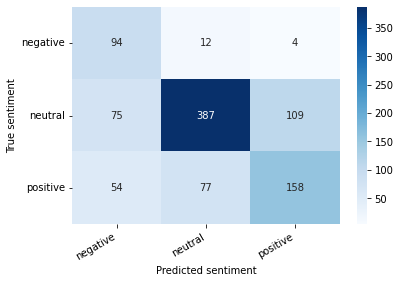

In [134]:
method = "BERT"
classification = "Bernoulli Naive-Bayes"

model = BernoulliNB(alpha=0.01)

# Training 
model.fit(bert_sentence_training_features, train_data["score"])

# Evaluation
y_pred_bert_sentences_nb = model.predict(bert_sentence_test_features)
y_prob_bert_sentences_nb = model.predict_proba(bert_sentence_test_features)

# Result
printResult(method, classification, y_pred_bert_sentences_nb, y_prob_bert_sentences_nb)

In [80]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(bow_training_features, train_data["score"])

print(grid.best_estimator_)

# Decision Tree
model = DecisionTreeClassifier(max_features='auto', random_state=42)

DecisionTreeClassifier(max_depth=30)


Method: Bag of Words
Classifier: Decision Tree
Accuracy: 74.23

              precision    recall  f1-score   support

           0       0.62      0.45      0.53       110
           1       0.75      0.94      0.83       571
           2       0.75      0.47      0.58       289

    accuracy                           0.74       970
   macro avg       0.71      0.62      0.65       970
weighted avg       0.74      0.74      0.72       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


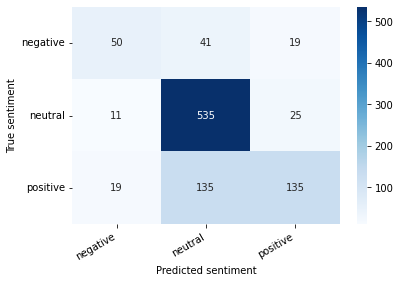

In [135]:
method = "Bag of Words"
classification = "Decision Tree"

model=DecisionTreeClassifier(max_depth=30)

# Training
model.fit(bow_training_features, train_data["score"])

# Evaluation
y_pred_bow_dt = model.predict(bow_test_features)

y_prob_bow_dt = model.predict_proba(bow_test_features)
# Result
printResult(method, classification, y_pred_bow_dt, y_prob_bow_dt)

In [84]:
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(tfidf_with_stop_training_features, train_data["score"])

print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=30)
DecisionTreeClassifier(max_depth=30)


Method: TF-IDF with stop words
Classifier: Decision Tree
Accuracy: 73.71

              precision    recall  f1-score   support

           0       0.73      0.49      0.59       110
           1       0.74      0.91      0.82       571
           2       0.72      0.49      0.59       289

    accuracy                           0.74       970
   macro avg       0.73      0.63      0.66       970
weighted avg       0.73      0.74      0.72       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


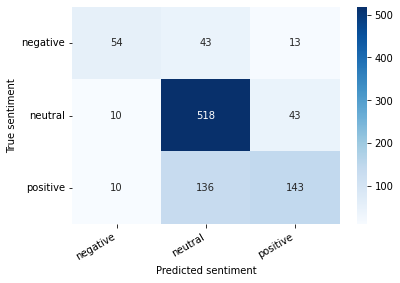

In [137]:
method = "TF-IDF with stop words"
classification = "Decision Tree"

model = DecisionTreeClassifier(max_depth=30)
# Training
model.fit(tfidf_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_with_stop_dt = model.predict(tfidf_with_stop_test_features)

y_prob_tfidf_with_stop_dt = model.predict_proba(tfidf_with_stop_test_features)
# Result
printResult(method, classification, y_pred_tfidf_with_stop_dt, y_prob_tfidf_with_stop_dt)

In [86]:
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(tfidf_no_stop_training_features, train_data["score"])

print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=40)


Method: TF-IDF with no stop words
Classifier: Decision Tree
Accuracy: 74.02

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       110
           1       0.75      0.93      0.83       571
           2       0.75      0.47      0.58       289

    accuracy                           0.74       970
   macro avg       0.70      0.62      0.65       970
weighted avg       0.74      0.74      0.72       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000


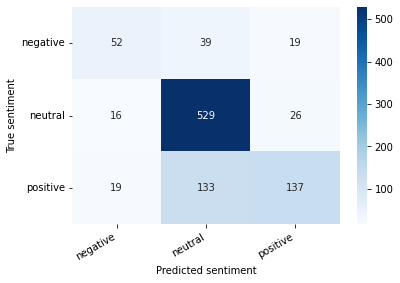

In [138]:
method = "TF-IDF with no stop words"
classification = "Decision Tree"

model = DecisionTreeClassifier(max_depth=40)

# Training
model.fit(tfidf_no_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_no_stop_dt = model.predict(tfidf_no_stop_test_features)
y_prob_tfidf_no_stop_dt = model.predict_proba(tfidf_no_stop_test_features)

# Result
printResult(method, classification,y_pred_tfidf_no_stop_dt, y_prob_tfidf_no_stop_dt)

In [88]:
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(word2vec_with_stop_training_features, train_data["score"])

print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=5)


Method: Word2Vec
Classifier: Decision Tree
Accuracy: 62.37

              precision    recall  f1-score   support

           0       0.38      0.03      0.05       110
           1       0.68      0.87      0.77       571
           2       0.45      0.36      0.40       289

    accuracy                           0.62       970
   macro avg       0.50      0.42      0.40       970
weighted avg       0.58      0.62      0.57       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 1.000000
Area under the ROC curve : 0.996588


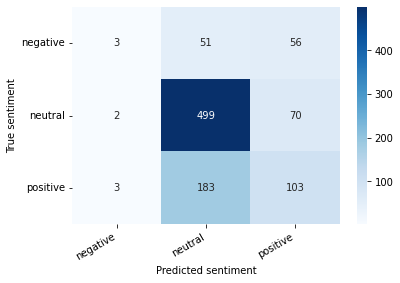

In [139]:
method = "Word2Vec"
classification = "Decision Tree"

model = DecisionTreeClassifier(max_depth=5)

# Training
model.fit(word2vec_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_w2v_with_stop_dt = model.predict(word2vec_with_stop_test_features)
y_prob_w2v_with_stop_dt = model.predict_proba(word2vec_with_stop_test_features)

# Result
printResult(method, classification, y_pred_w2v_with_stop_dt, y_prob_w2v_with_stop_dt)

In [90]:
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(bert_sentence_training_features, train_data["score"])

print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=6)


Method: BERT
Classifier: Decision Tree
Accuracy: 69.38

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       110
           1       0.75      0.79      0.77       571
           2       0.59      0.54      0.56       289

    accuracy                           0.69       970
   macro avg       0.65      0.65      0.65       970
weighted avg       0.69      0.69      0.69       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 0.997766
Area under the ROC curve : 1.000000


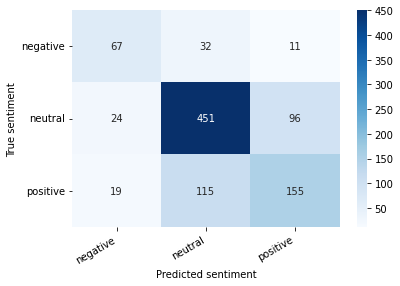

In [145]:
method = "BERT"
classification = "Decision Tree"

model = DecisionTreeClassifier(max_depth=6)

# Training
model.fit(bert_sentence_training_features, train_data["score"])

# Evaluation
y_pred_bert_sentences_dt = model.predict(bert_sentence_test_features)
y_prob_bert_sentences_dt = model.predict_proba(bert_sentence_test_features)

# Result
printResult(method, classification, y_pred_bert_sentences_dt, y_prob_bert_sentences_dt)

In [92]:
#Random Forest
rfc=RandomForestClassifier(random_state=42)

In [93]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [94]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(bow_training_features, train_data["score"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [95]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


Method: Bag of Words
Classifier: Random Forest
Accuracy: 64.85

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       110
           1       0.64      1.00      0.78       571
           2       0.71      0.17      0.27       289

    accuracy                           0.65       970
   macro avg       0.78      0.42      0.41       970
weighted avg       0.70      0.65      0.56       970

Area under the ROC curve : 0.999479
Area under the ROC curve : 0.998352
Area under the ROC curve : 0.992472


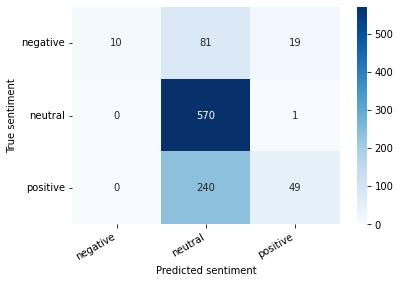

In [146]:
method = "Bag of Words"
classification = "Random Forest"
model = RandomForestClassifier(
    n_estimators=500, 
    random_state=42,
    criterion='gini',
    max_depth=8,
    max_features='auto'
)
# Training
model.fit(bow_training_features, train_data["score"])

# Evaluation
y_pred_bow_rf = model.predict(bow_test_features)

y_prob_bow_rf = model.predict_proba(bow_test_features)
# Result
printResult(method, classification, y_pred_bow_rf, y_prob_bow_rf)

In [97]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(tfidf_with_stop_training_features, train_data["score"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [98]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


Method: TD-IDF with stop words
Classifier: Random Forest
Accuracy: 62.68

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       110
           1       0.62      1.00      0.76       571
           2       0.77      0.12      0.21       289

    accuracy                           0.63       970
   macro avg       0.79      0.38      0.34       970
weighted avg       0.71      0.63      0.52       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 0.996100
Area under the ROC curve : 0.993061


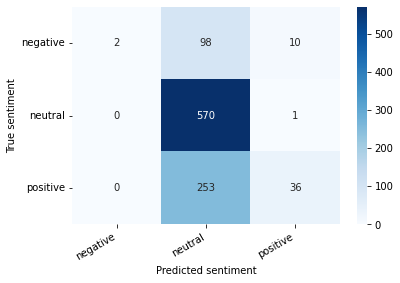

In [147]:
method = "TD-IDF with stop words"
classification = "Random Forest"
model = RandomForestClassifier(
    n_estimators=500, 
    random_state=42,
    criterion='gini',
    max_depth=8,
    max_features='auto'
)
# Training
model.fit(tfidf_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_with_stop_rf = model.predict(tfidf_with_stop_test_features)

y_prob_tfidf_with_stop_rf = model.predict_proba(tfidf_with_stop_test_features)
# Result
printResult(method, classification, y_pred_tfidf_with_stop_rf, y_prob_tfidf_with_stop_rf)

In [100]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(tfidf_no_stop_training_features, train_data["score"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [101]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Method: TD-IDF with no stop words
Classifier: Random Forest
Accuracy: 61.13

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       110
           1       0.60      1.00      0.75       571
           2       0.91      0.07      0.13       289

    accuracy                           0.61       970
   macro avg       0.84      0.36      0.31       970
weighted avg       0.74      0.61      0.49       970

Area under the ROC curve : 1.000000
Area under the ROC curve : 0.998222
Area under the ROC curve : 0.996143


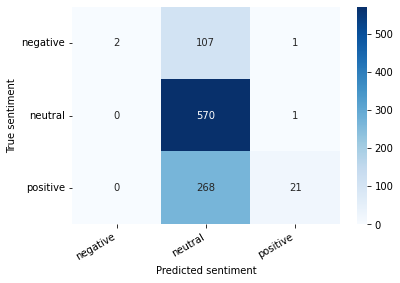

In [148]:
method = "TD-IDF with no stop words"
classification = "Random Forest"
model = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    criterion='entropy',
    max_depth=8,
    max_features='auto'
)
# Training
model.fit(tfidf_no_stop_training_features, train_data["score"])

# Evaluation
y_pred_tfidf_no_stop_rf = model.predict(tfidf_no_stop_test_features)
y_prob_tfidf_no_stop_rf = model.predict_proba(tfidf_no_stop_test_features)

# Result
printResult(method, classification ,y_pred_tfidf_no_stop_rf, y_prob_tfidf_no_stop_rf)

In [103]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(word2vec_with_stop_training_features, train_data["score"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [104]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}


Method: Word2Vec
Classifier: Random Forest
Accuracy: 62.27

              precision    recall  f1-score   support

           0       0.34      0.09      0.14       110
           1       0.67      0.92      0.77       571
           2       0.44      0.23      0.30       289

    accuracy                           0.62       970
   macro avg       0.49      0.42      0.41       970
weighted avg       0.56      0.62      0.56       970

Area under the ROC curve : 0.995090
Area under the ROC curve : 0.999100
Area under the ROC curve : 0.993693


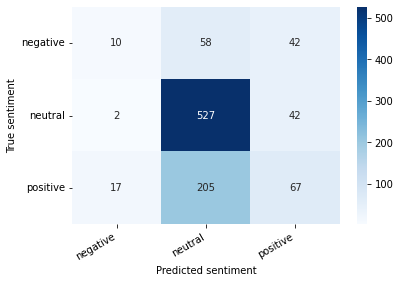

In [149]:
method = "Word2Vec"
classification = "Random Forest"
model = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    criterion='gini',
    max_depth=6,
    max_features='log2'
)
# Training
model.fit(word2vec_with_stop_training_features, train_data["score"])

# Evaluation
y_pred_w2v_with_stop_rf = model.predict(word2vec_with_stop_test_features)
y_prob_w2v_with_stop_rf = model.predict_proba(word2vec_with_stop_test_features)

# Result
printResult(method, classification, y_pred_w2v_with_stop_rf, y_prob_w2v_with_stop_rf)

In [109]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(bert_sentence_training_features, train_data["score"])

KeyboardInterrupt: ignored

In [ ]:
print(grid.best_params_)

Method: BERT
Classifier: Random Forest
Accuracy: 75.77

              precision    recall  f1-score   support

           0       0.76      0.59      0.66       110
           1       0.75      0.94      0.84       571
           2       0.79      0.46      0.58       289

    accuracy                           0.76       970
   macro avg       0.77      0.66      0.69       970
weighted avg       0.76      0.76      0.74       970

Area under the ROC curve : 0.999184
Area under the ROC curve : 0.996918
Area under the ROC curve : 0.995026


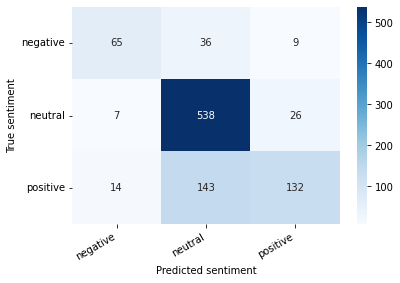

In [151]:
method = "BERT"
classification = "Random Forest" 
model = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    criterion='gini',
    max_depth=8,
    max_features='auto'
)
# Training
model.fit(bert_sentence_training_features, train_data["score"])

# Evaluation
y_pred_bert_sentences_rf = model.predict(bert_sentence_test_features)
y_prob_bert_sentences_rf = model.predict_proba(bert_sentence_test_features)

# Result
printResult(method, classification, y_pred_bert_sentences_rf, y_prob_bert_sentences_rf)